<a href="https://colab.research.google.com/github/usaidahmed01/Pandas-Seaborn-and-Matplotlib/blob/master/22_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info() # mostlyh data are in numeric form like,  0 , 1 because we send the data to ML in 0s and 1s.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.columns = ['Age' , 'Sex' , 'ChestPainType' , 'RestBP' , 'Cholesterol' , 'FBS' , 'RestECG' , 'MaxHR' , 'ExerciseAngina' , 'Oldpeak' , 'ST_Slope' , 'NumVesselsFluoro' , 'Thal' , 'Target']
# OR df.rename(columns = '')
df.head()

,Age,Sex,ChestPainType,RestBP,Cholesterol,FBS,RestECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,NumVesselsFluoro,Thal,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


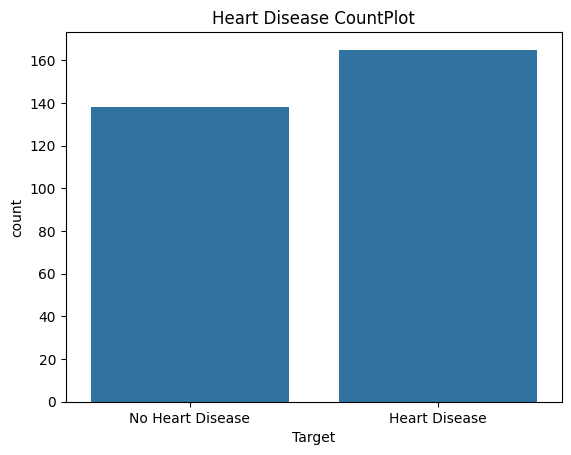

In [ ]:
plt.title('Heart Disease CountPlot')
sns.countplot(x = 'Target' ,data = df)
plt.xticks([0 , 1] , ['No Heart Disease' , 'Heart Disease'])
plt.show()

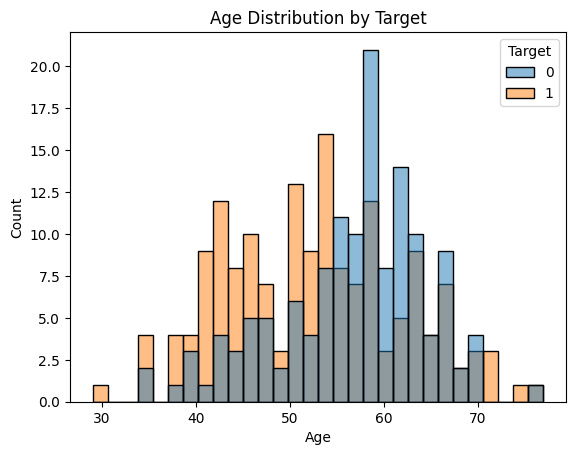

In [ ]:
plt.title('Age Distribution by Target')
sns.histplot(x = 'Age' , hue = 'Target' ,data = df , bins = 30)
plt.show()
# Target => 0 : No Disease , 1 : Disease

# Insight: Disease peak btw 40 to 60

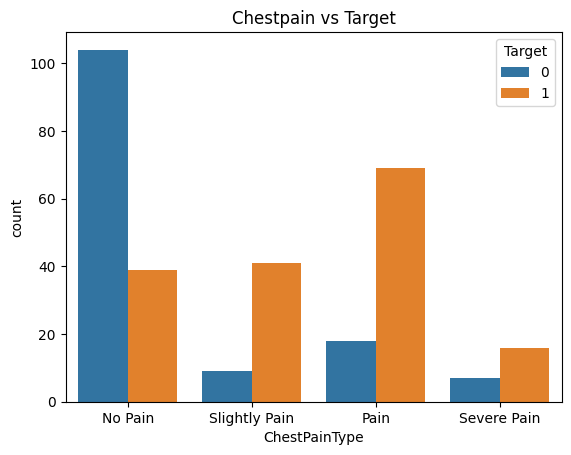

In [ ]:
plt.title('Chestpain vs Target (Heart Disease)')
sns.countplot(x = 'ChestPainType' , hue = 'Target' ,data = df)
# plt.xticks(rotation = 45)
plt.xticks([0 , 1 , 2 , 3] , ['No Pain' , 'Slightly Pain' , 'Pain' , 'Severe Pain'])
plt.show()

# Insights: 2 ChestPainType has more number of Heart Disease patients

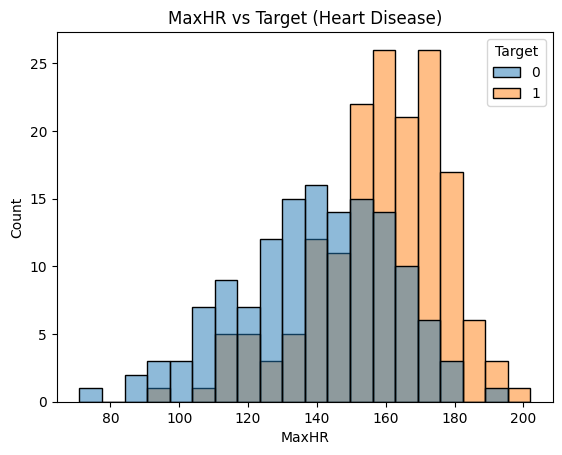

In [ ]:
plt.title('MaxHR vs Target (Heart Disease)')
sns.histplot(x = 'MaxHR' , hue = 'Target' , data = df , bins = 20)
plt.show()

# Insights: High Heart => Heart Disease

In [ ]:
# OR
df.groupby('Target')['MaxHR'].mean()

,MaxHR
Target,
0,139.101449
1,158.466667


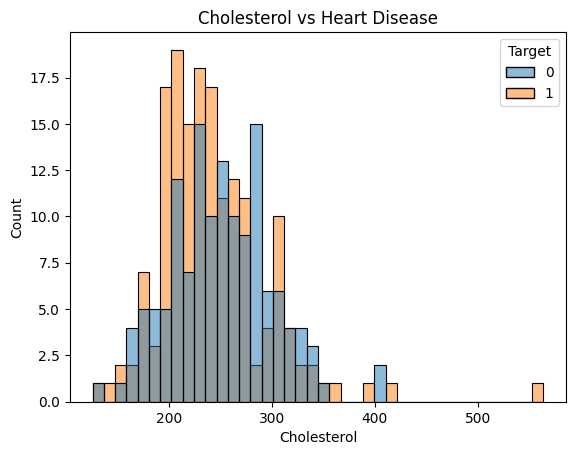

In [ ]:
plt.title('Cholesterol vs Heart Disease')
sns.histplot(x = 'Cholesterol' , hue = 'Target' , data = df , bins = 40)
plt.show()

# Insights: Cholesterol Does not have any effect on Heart Disease

In [ ]:
df[['Cholesterol' , 'Target']].groupby('Target').describe()

Cholesterol                                                           
             count        mean        std    min     25%    50%    75%    max
Target                                                                       
0            138.0  251.086957  49.454614  131.0  217.25  249.0  283.0  409.0
1            165.0  242.230303  53.552872  126.0  208.00  234.0  267.0  564.0

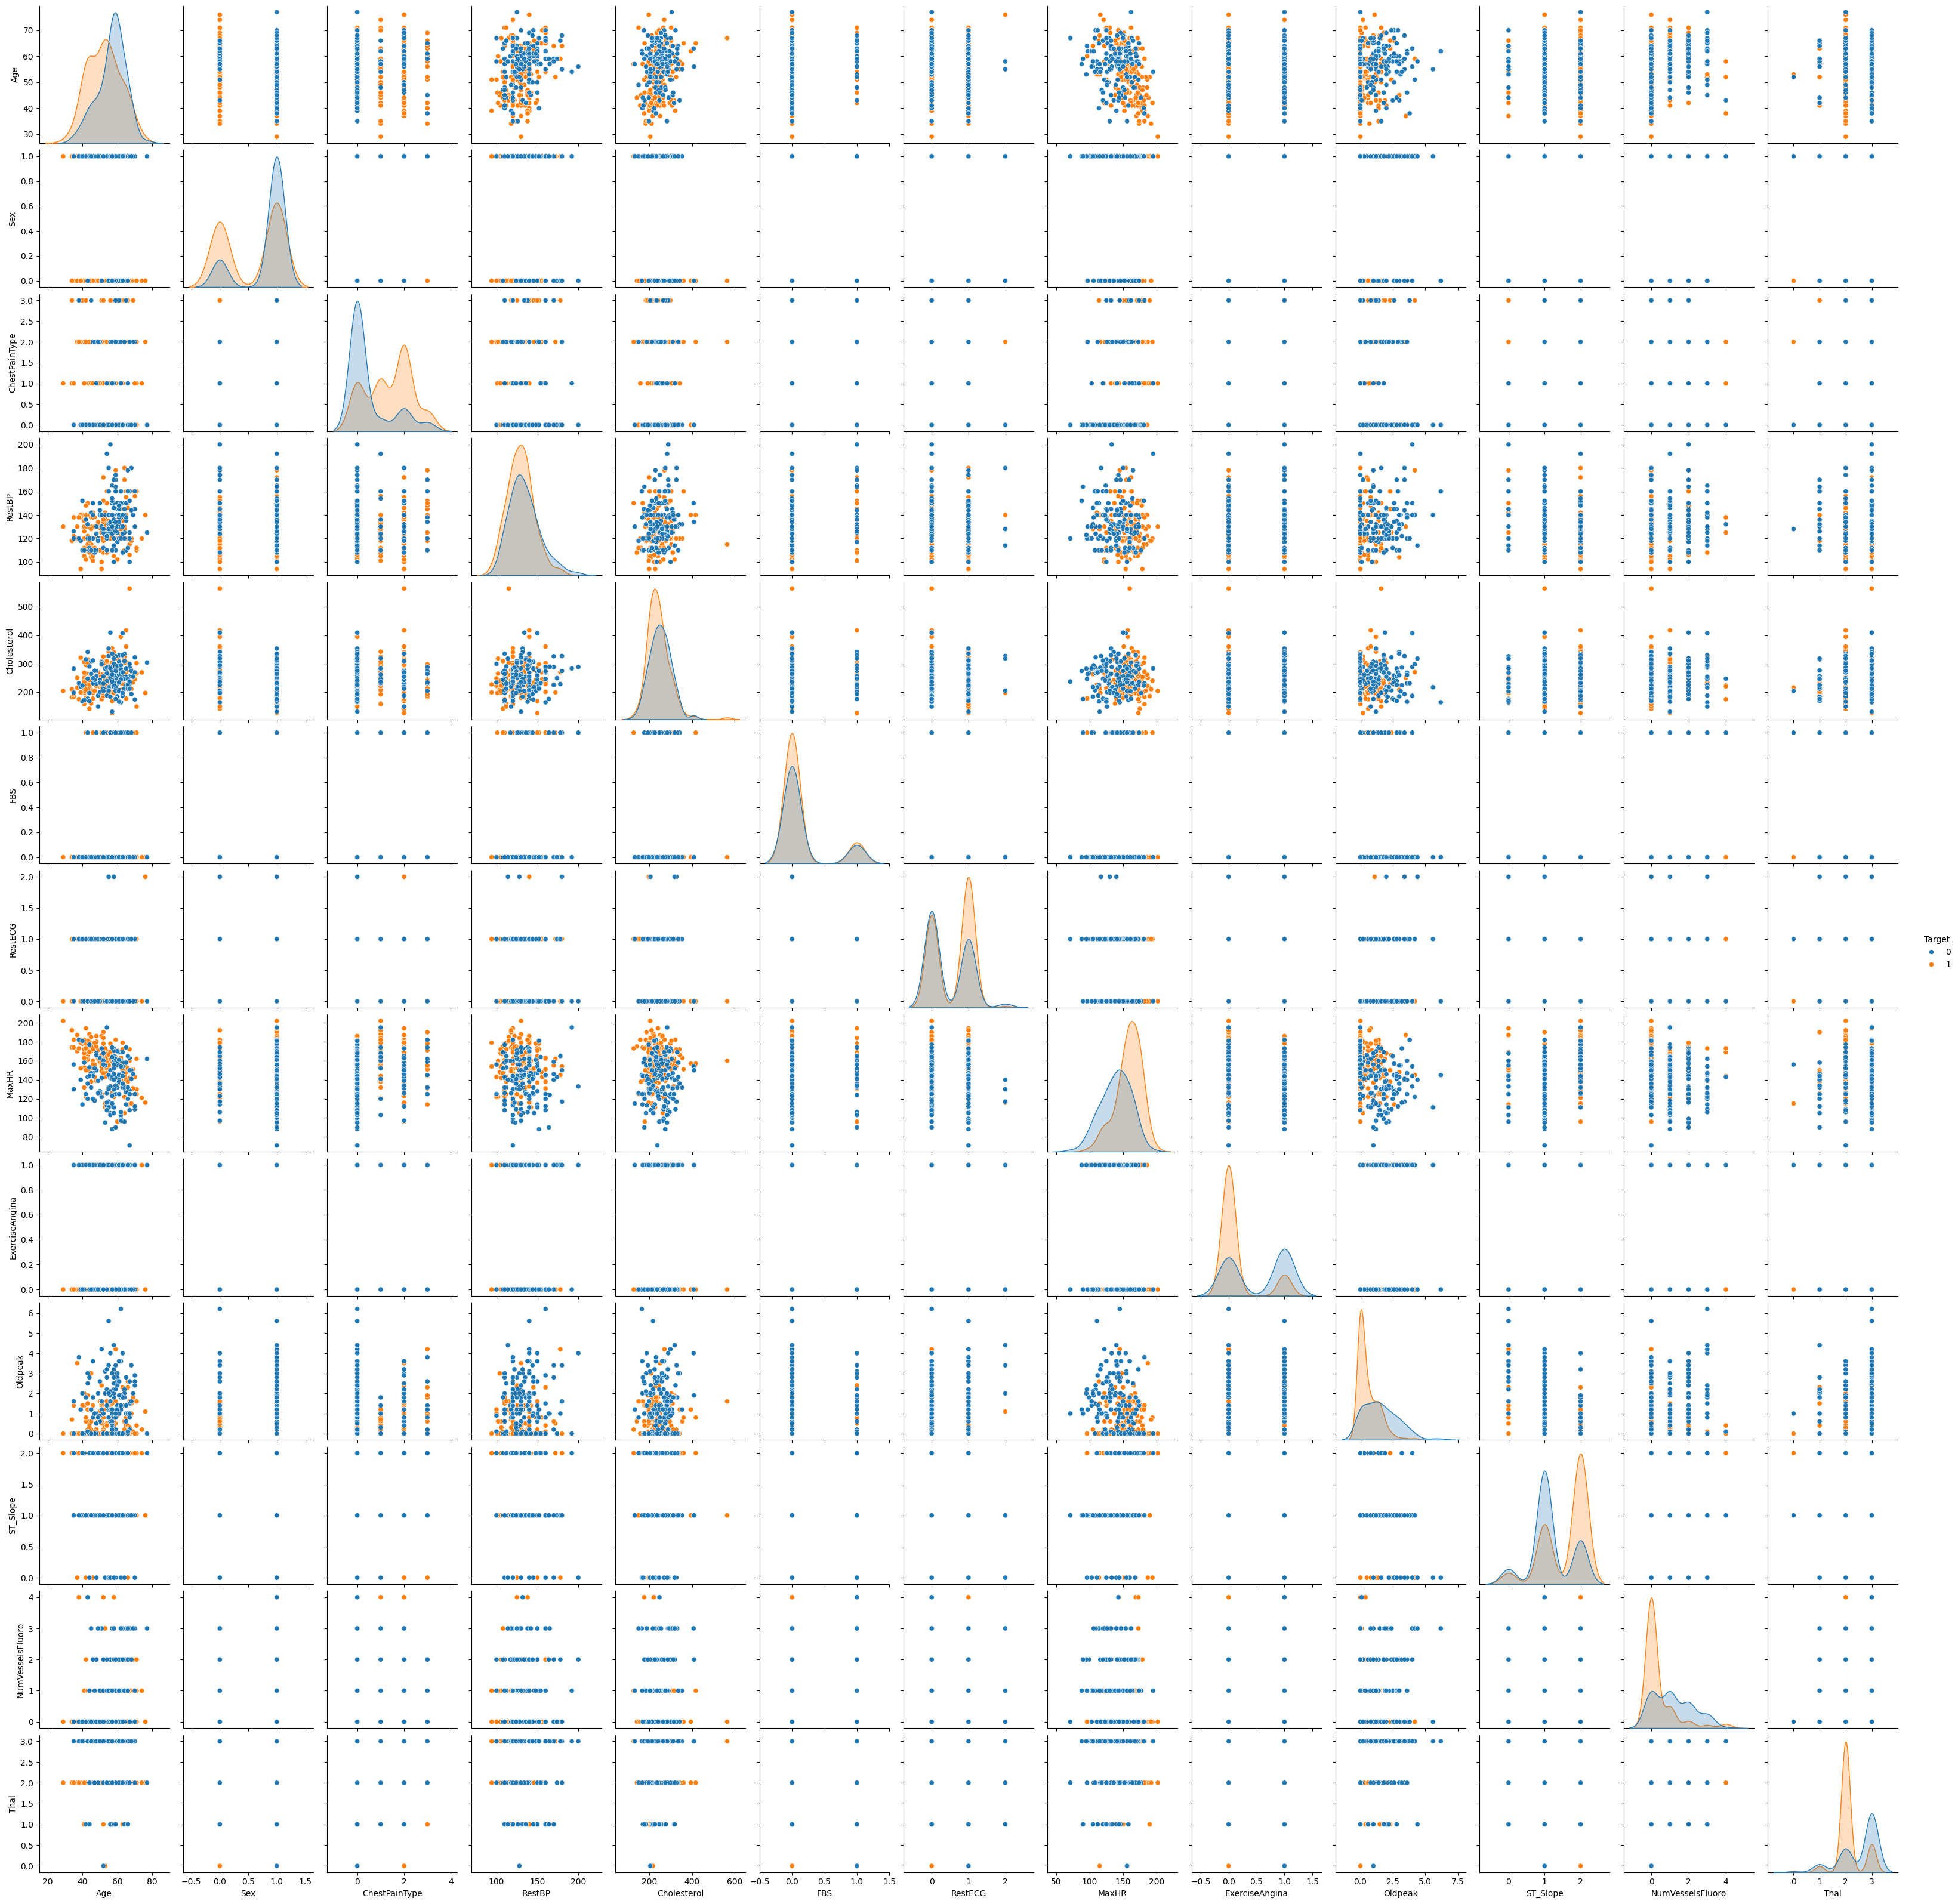

In [ ]:
# 3d visualization of df using seaborn
sns.pairplot(df , hue = 'Target')
plt.show()

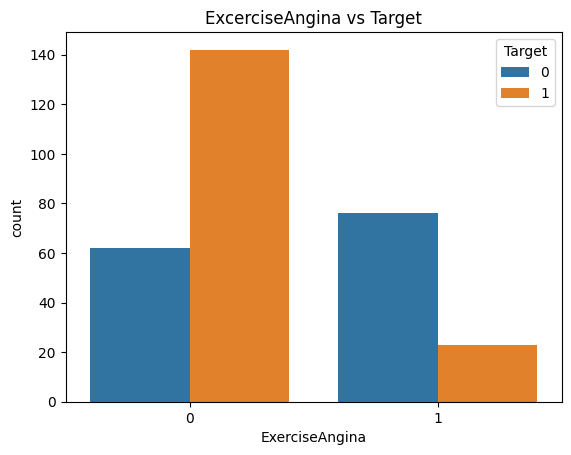

In [ ]:
plt.title('ExcerciseAngina vs Target')
sns.countplot(x = 'ExerciseAngina' , hue = 'Target' , data = df)
plt.show()

# Insights: ExerciseAngina affects

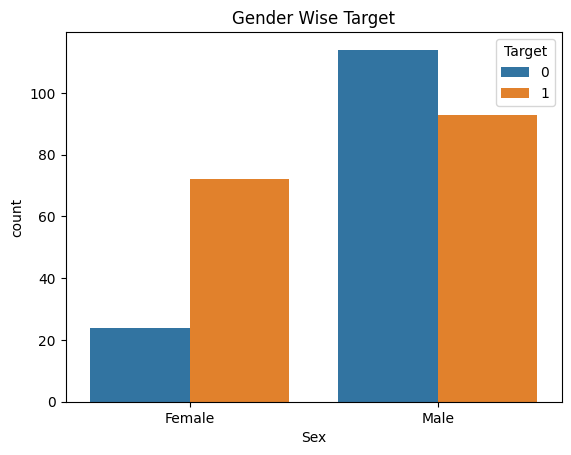

Target         0         1
Sex                       
0       0.250000  0.750000
1       0.550725  0.449275


In [ ]:
plt.title('Gender Wise Target')
sns.countplot(x = 'Sex' ,  hue = 'Target' , data = df)
plt.xticks([0 , 1] , ['Female' , 'Male'])
plt.show()

print(df.groupby('Sex')['Target'].value_counts(normalize= True).unstack())

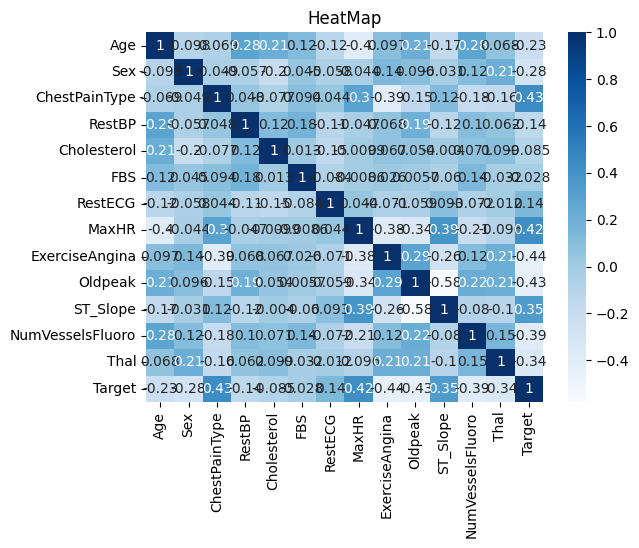

<Figure size 2000x2000 with 0 Axes>

In [ ]:
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')
plt.title('HeatMap')
plt.figure(figsize = (20 , 20))
plt.show()